# **Plots notebook**

This notebook plots together the results obtained from the advection equation solver by reading them from specially created files.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# **Method and Initial condition selection**

Select what method and profile you want to see.

Be sure the results for it have been previously saved.

Adjust the parameters below at your will.

In [2]:
#             0       1        2          3
methods = ["FTCS", "LAX-F", "LAX-W", "LEAPFROG"]

#                       0       1
intial_conditions = ["GAUS", "STEP"]

# Select the method
method = methods[2]

# Select the initial condition
initial_condition = intial_conditions[1]

# Whether to save the plots or not
save = False

# Size of the figures
figsize = (10, 8)

# dpi of the figures
dpi = 500

# Files managing

Defining the needed variables.

In [3]:
# File paths and plotting variables
if method.lower() == "ftcs":
    method_dir_path = "FTCS"
    l2_norm_data_path = "l2norm_FTCS.dat"
    logy = True
elif method.lower() == "lax-f":
    method_dir_path = "LAX-FRIEDRICHS"
    l2_norm_data_path = "l2norm_LAX.dat"
    logy = False
elif method.lower() == "leapfrog":
    method_dir_path = "LEAPFROG"
    l2_norm_data_path = "l2norm_LEAPFROG.dat"
    logy = False
elif method.lower() == "lax-w":
    method_dir_path = "LAX-WENDROFF"
    l2_norm_data_path = "l2norm_LAXWENDROFF.dat"
    logy = False

if initial_condition.lower() == "gaus":
    folder_name = "GAUS"
    plot_l2_saved = True
elif initial_condition.lower() == "step":
    folder_name = "STEP"
    plot_l2_saved = False

folder_path = os.path.join(method_dir_path, folder_name)
data_dir_path = os.path.join(folder_path, "data")
images_dir_path = os.path.join(folder_path, "images")

# Plotting function

A function that plots together the results for a given scheme and profile in a readable way.

In [4]:
# type = 'l2', 'IF' (l2norm, Initial/Final)
def plot_merged_data(data_folder_path, typ='',
                     logy=False, figsize=(6.4, 4.8), dpi=100,
                     first_i_only=True, plot_l2_saved=True, cf_ref=0.5, nx_ref=101,
                     save=False, images_folder_path='', init_cond='', method=''):
    # Get the desired files (based on how file names are written)
    file_paths = [os.path.join(data_folder_path, file_name) for file_name in os.listdir(data_folder_path)
                  if file_name.split('_')[0].lower() == typ.lower()]
    
    # Load the desired files
    data = [np.load(file_path) for file_path in file_paths]

    # Extract relevant informations and define linestyles
    cf = []
    nx = []
    ls = []

    for i in range(len(data)):
        # Based on how 'par_label' is written
        cf.append(float(str(data[i]['par_label']).split('$')[2]))
        nx.append(int(str(data[i]['par_label']).split('$')[4]))

        if cf[i] == cf_ref:
            if nx[i] == nx_ref:
                ls.append('-')
            else:
                ls.append('--')
        else:
            ls.append(':')

    # Plot and format data
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

    if typ.lower() == 'l2':
        ax.set_title(r"Normalized $L_2$ norm")
        ax.set_xlabel(r"$time$")
        ax.set_ylabel(r"$L_2 / L_2(t = 0)$")

        for i in range(len(data)):
            label = str(data[i]['par_label'])
            if cf[i] == cf_ref and nx[i] == nx_ref:
                label = "Ref: " + str(data[i]['par_label'])
            
            ax.plot(data[i]['time'], data[i]['l2norm'], ls=ls[i], label=label)

        if plot_l2_saved:
            l2_saved = np.genfromtxt(l2_norm_data_path, comments='#')
            l2_saved_normalized = l2_saved[:, 1] / l2_saved[1][1]
            ax.plot(l2_saved[:, 0], l2_saved_normalized, '+', label=r'$C_f=0.5;\ N=101$')
    elif typ.lower() == 'if':
        ax.set_title("Initial and Final conditions")
        ax.set_xlabel(r"$x$")
        ax.set_ylabel(r"$u$")

        for i in range(len(data)):
            label = "Initial: " + str(data[i]['par_label'])
            if first_i_only:
                if cf[i] == cf_ref and nx[i] == nx_ref:
                    ax.plot(data[i]['x_grid'], data[i]['u_i'],
                            ls=ls[i], label=label, zorder=len(data)+i)
            else:
                ax.plot(data[i]['x_grid'], data[i]['u_i'],
                        ls=ls[i], label=label, zorder=len(data)+i)
            
            label = str(data[i]['par_label'])

            ax.plot(data[i]['x_grid'], data[i]['u_f'],
                    ls=ls[i], label=label, zorder=i)
    
    if logy:
        ax.set_yscale('log')
    
    ax.legend()

    if save:
        img_name = '_'.join([typ.upper(), init_cond, method])
        plt.savefig(os.path.join(images_folder_path, img_name), dpi=dpi)

    plt.show()

    return data

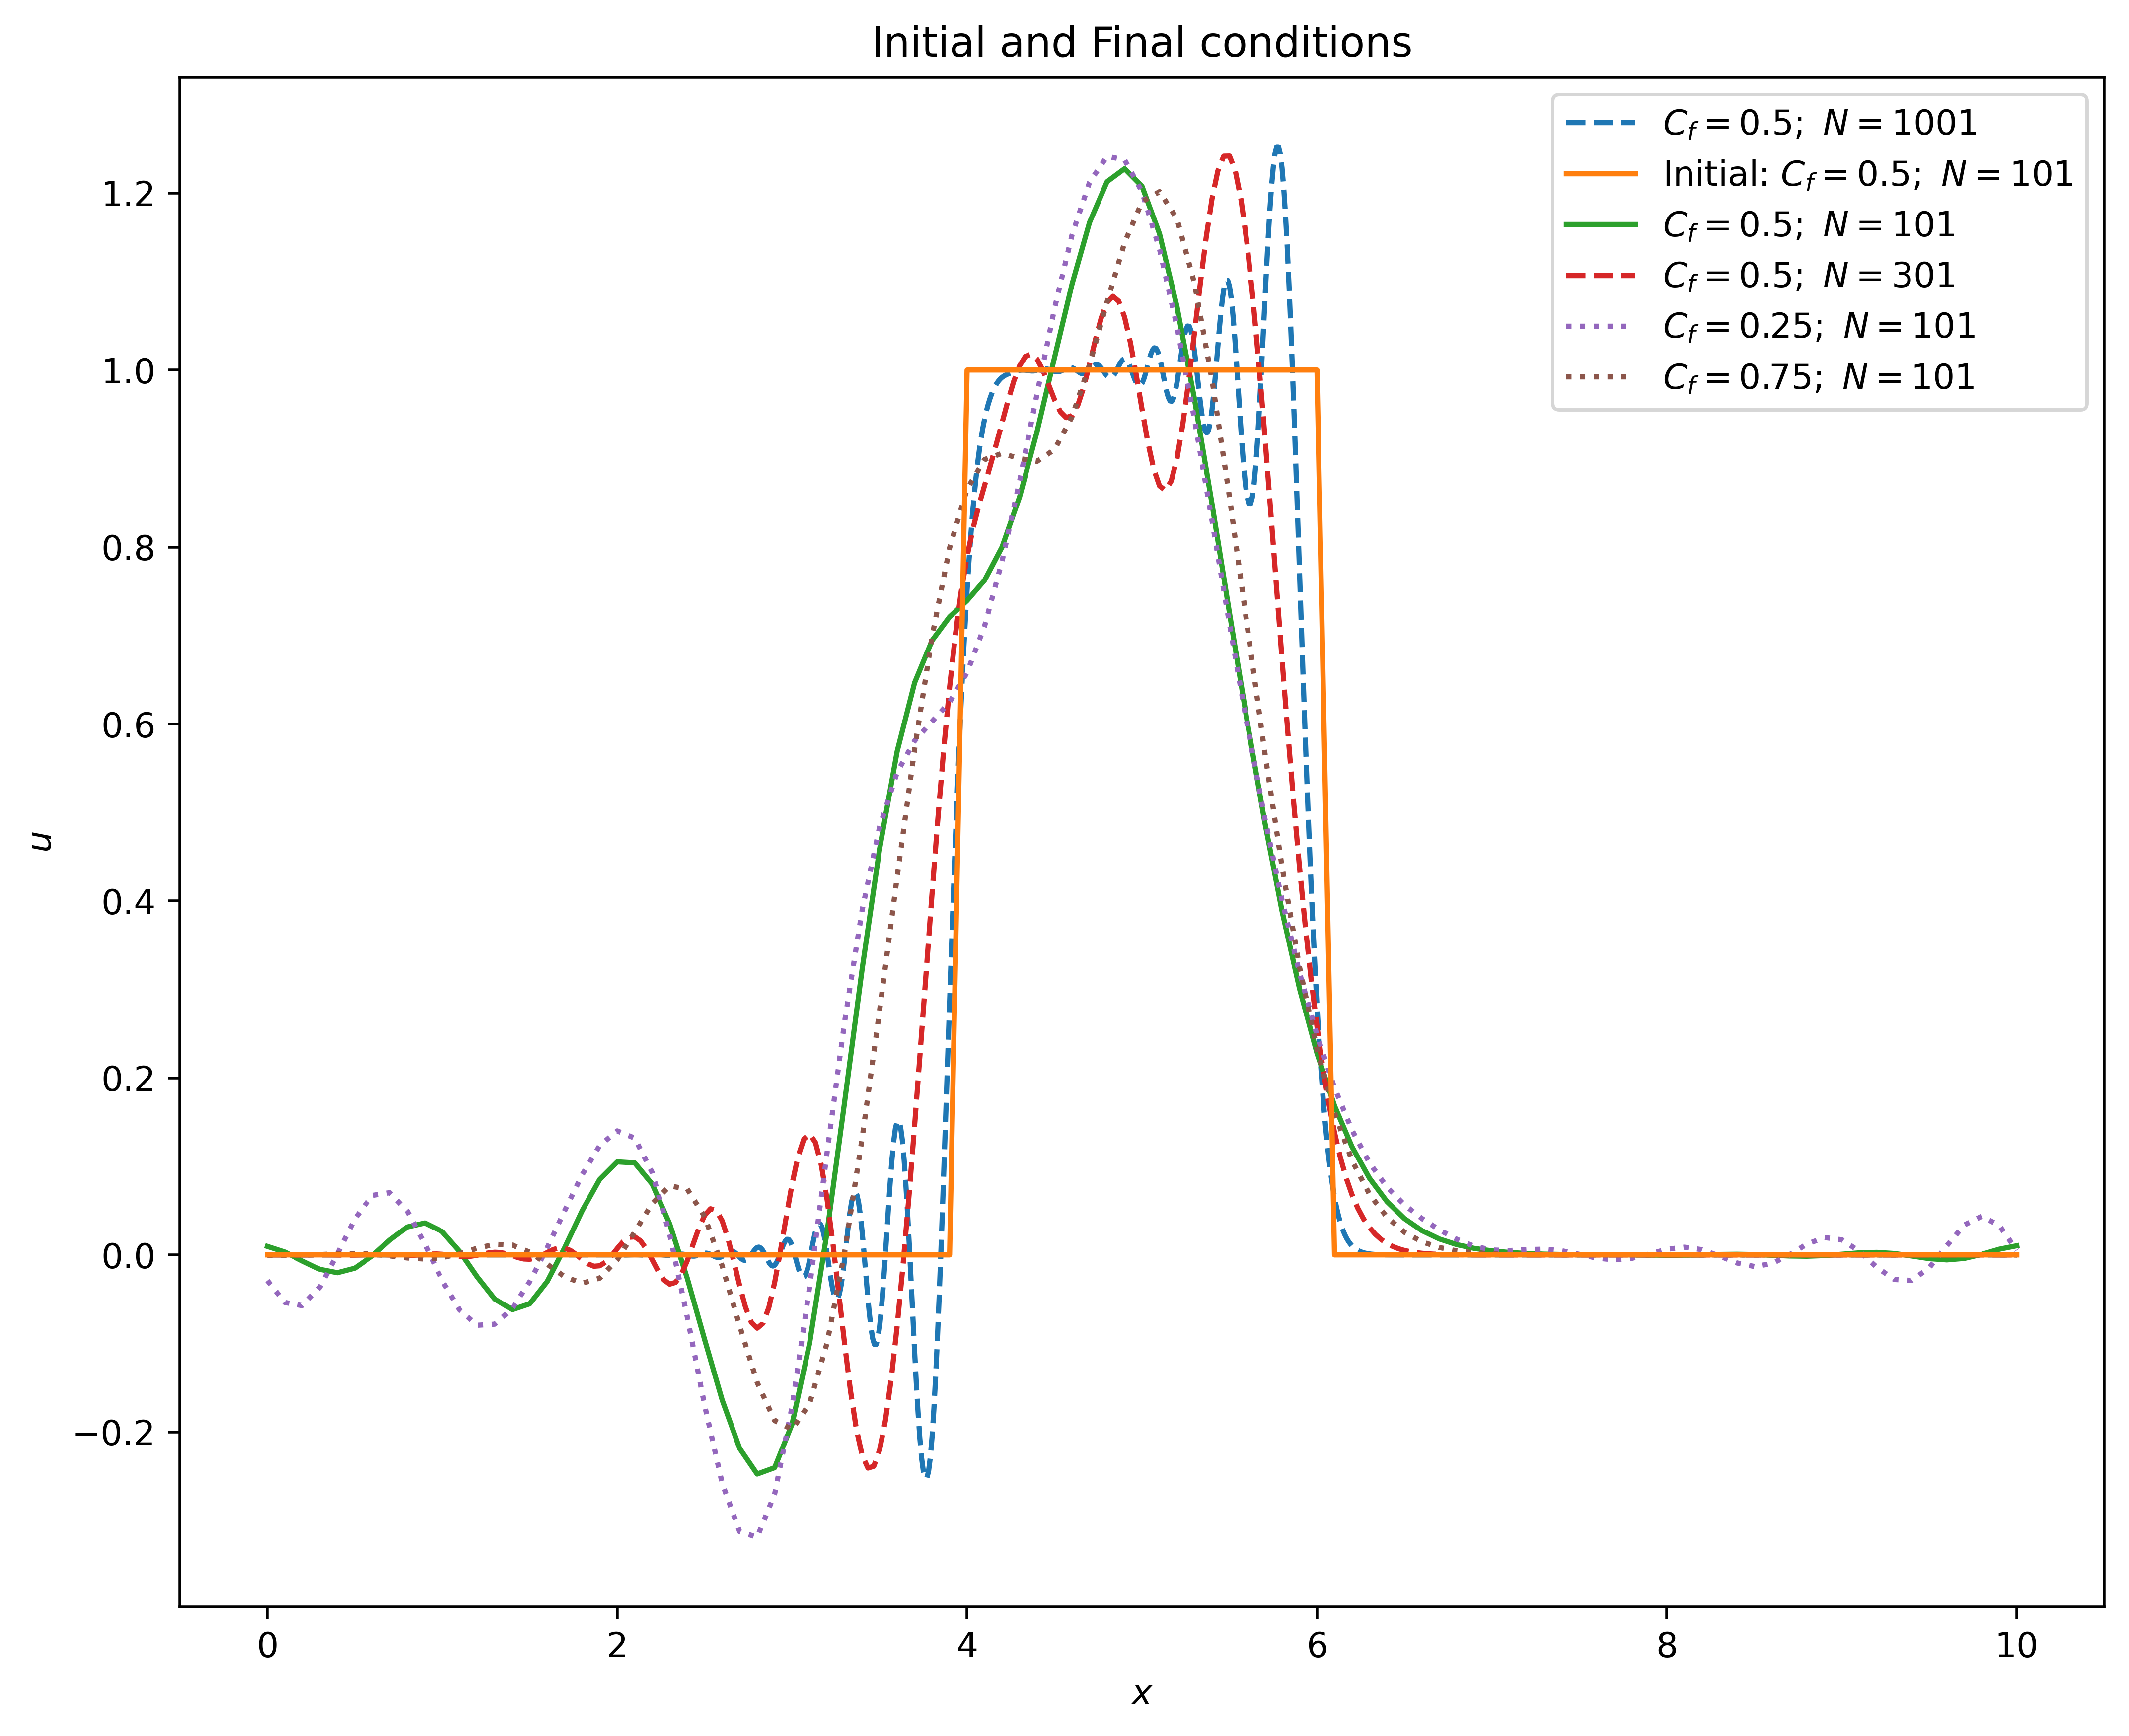

[NpzFile 'LAX-WENDROFF/STEP/data/IF_Cf-0.5_N-1001.npz' with keys: x_grid, u_i, u_f, par_label,
 NpzFile 'LAX-WENDROFF/STEP/data/IF_Cf-0.5_N-101.npz' with keys: x_grid, u_i, u_f, par_label,
 NpzFile 'LAX-WENDROFF/STEP/data/IF_Cf-0.5_N-301.npz' with keys: x_grid, u_i, u_f, par_label,
 NpzFile 'LAX-WENDROFF/STEP/data/IF_Cf-0.25_N-101.npz' with keys: x_grid, u_i, u_f, par_label,
 NpzFile 'LAX-WENDROFF/STEP/data/IF_Cf-0.75_N-101.npz' with keys: x_grid, u_i, u_f, par_label]

In [5]:
plot_merged_data(data_dir_path, typ='if',
                 figsize=figsize, dpi=dpi,
                 images_folder_path=images_dir_path, init_cond=initial_condition, method=method,
                 save=save)

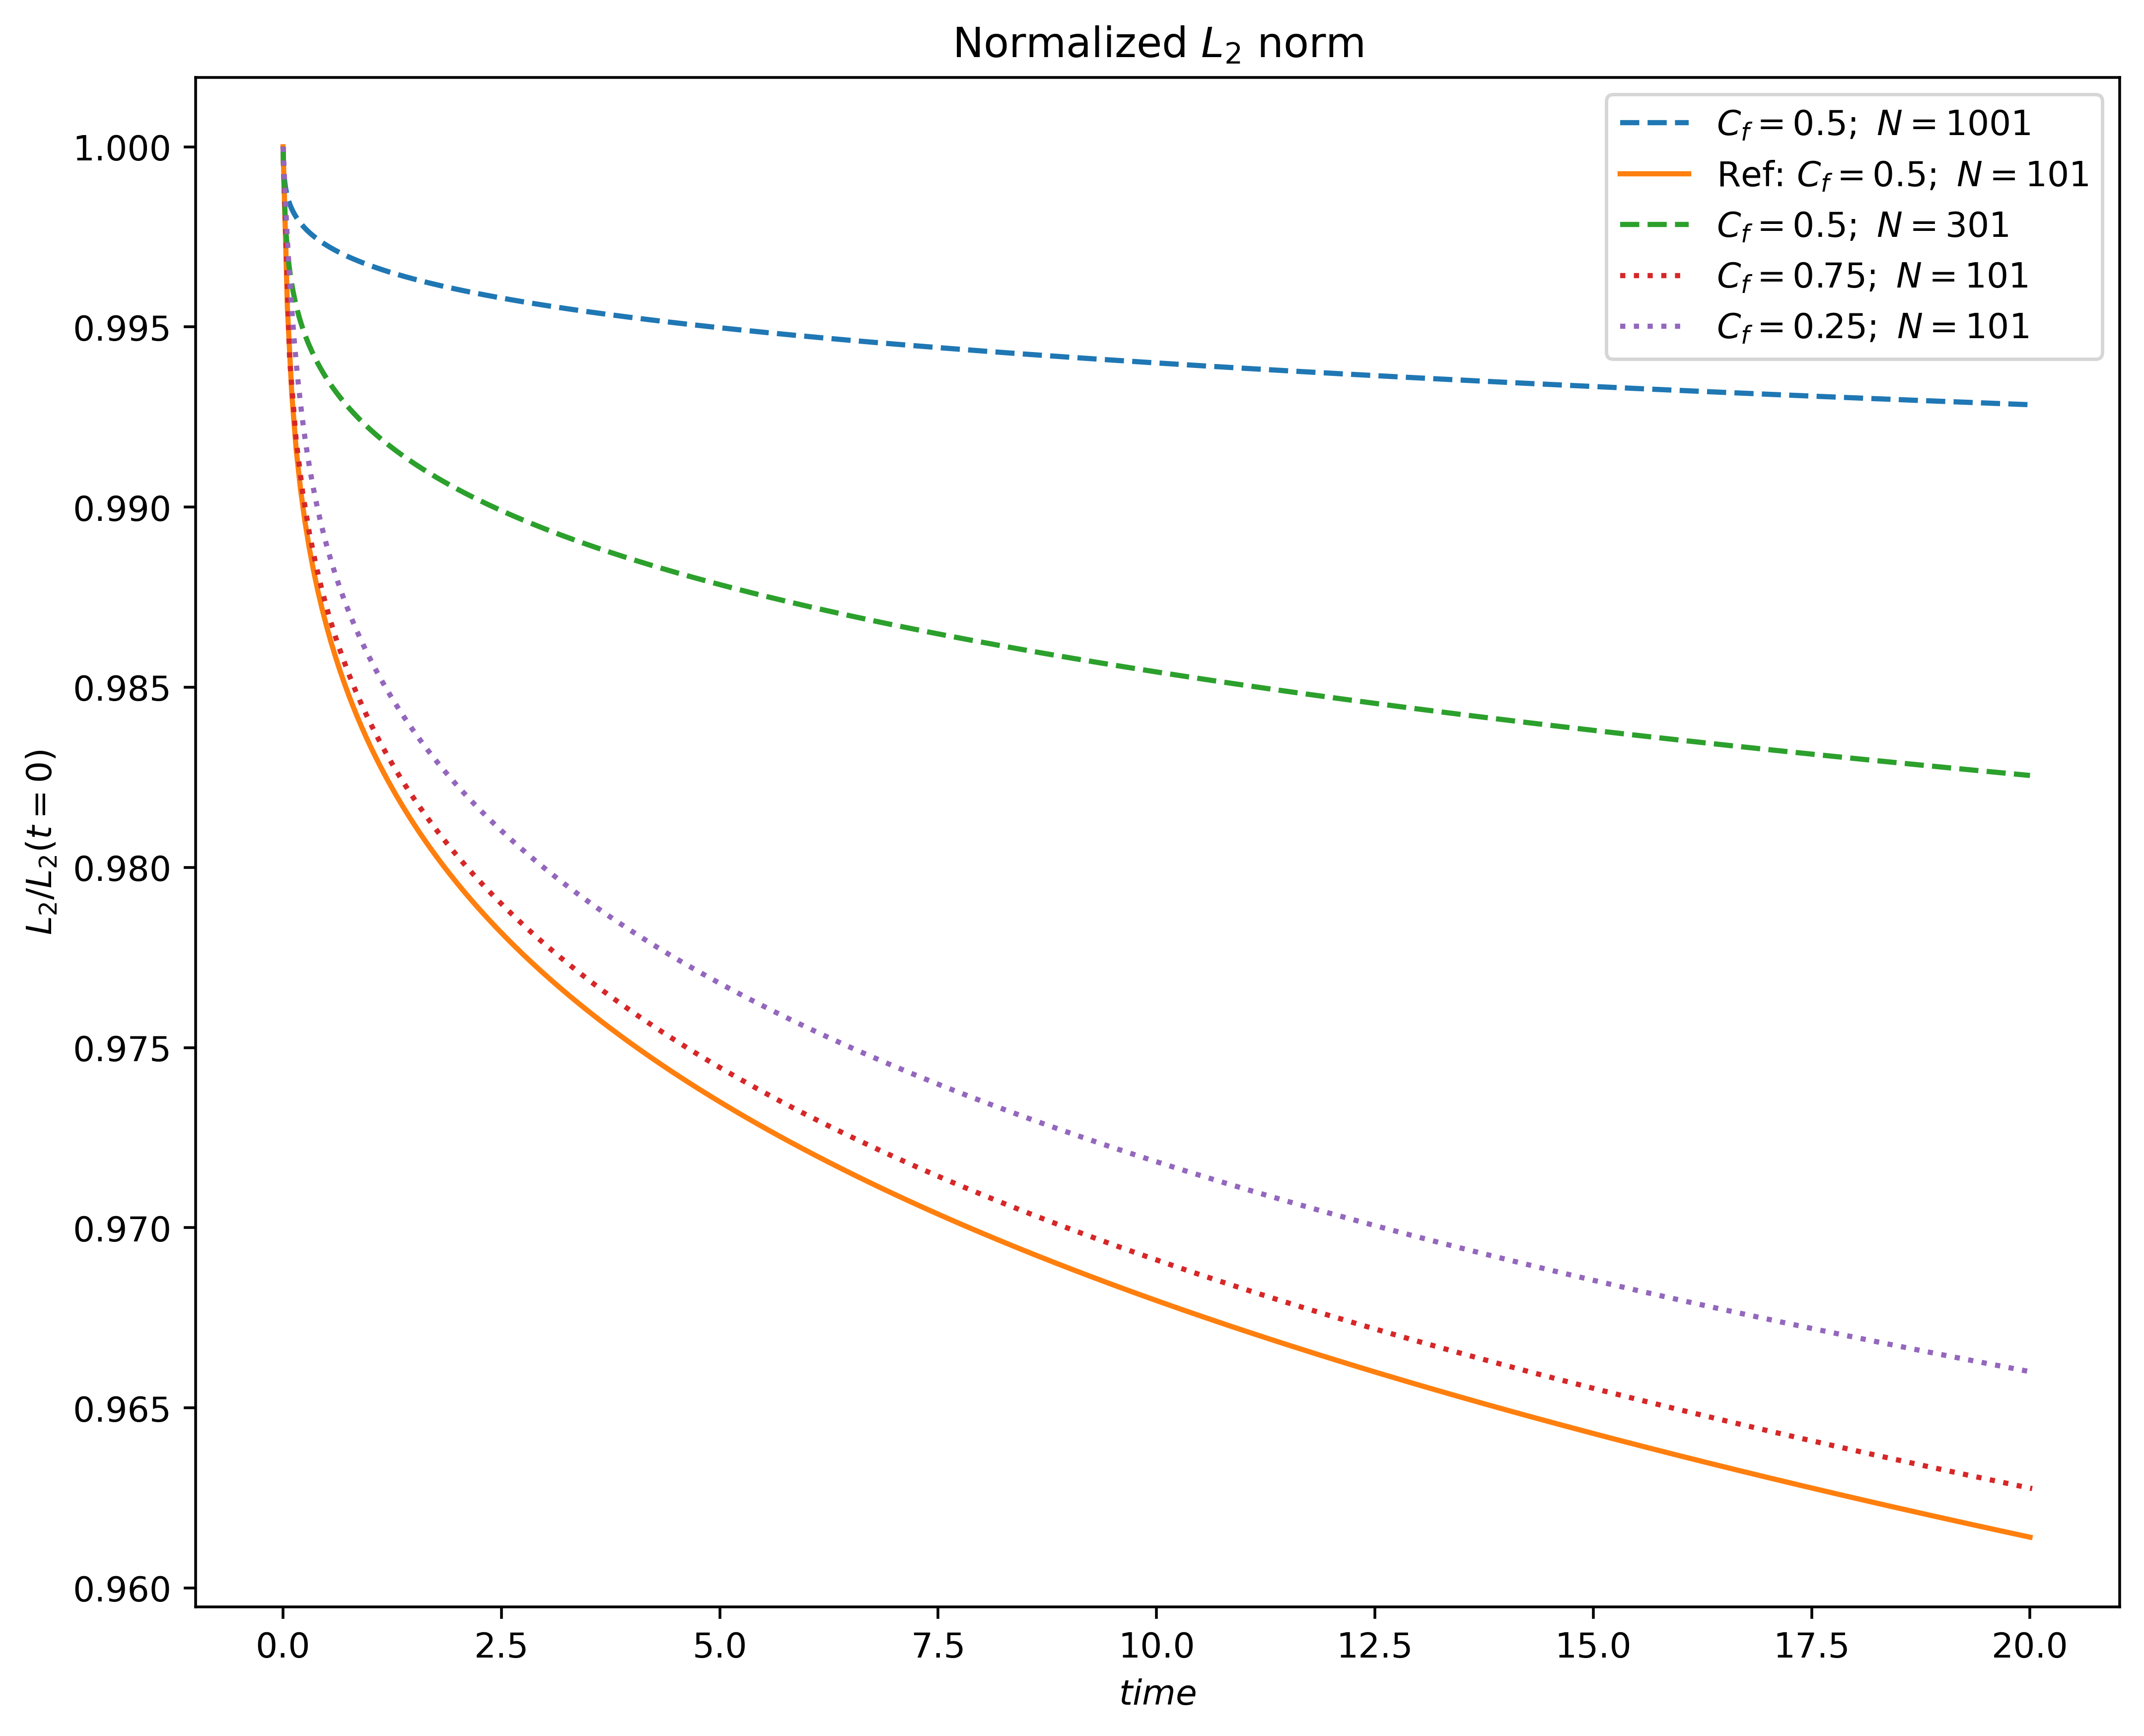

In [6]:
data = plot_merged_data(data_dir_path, typ='l2',
                        figsize=figsize, dpi=dpi,
                        plot_l2_saved=plot_l2_saved, logy=logy,
                        images_folder_path=images_dir_path, init_cond=initial_condition, method=method,
                        save=save)